# Case Study 3 : Data Mining in Image Data

**Dataset required in this case study:** 
* MNIST dataset


** NOTE **
* You can directly load the dataset from keras using: `from keras.datasets import mnist`
* You may need install tensorflow and keras first: https://keras.io/ 


# Problem: pick a data science problem that you plan to solve using the Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

### Problem: 
For this data science challenge, I'm using neural net design to recognize the correct label, or number, in MNIST handwritten 
digit images. This serves as the foundation for our study and practice of creating, assessing, and applying convolutional deep 
learning neural networks to image categorization. It also explains how to load the model later to generate predictions using 
fresh data after saving it.

In [76]:
# Install TensorFlow and upgrade Keras
!pip install tensorflow
!pip install --upgrade keras tensorflow

# Import required libraries
import numpy as np
from numpy import argmax
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler


# Data Collection/Processing: 

In [50]:
# Load MNIST dataset
#This line of code loads the MNIST dataset using the mnist.load_data() function from the keras.datasets module and assigns the training and testing data and labels to X_train, y_train, X_test, and y_test, respectively.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
data_generator = ImageDataGenerator(rescale=1./255)

# Display the shape of training and test sets
# These lines of code print the shape of the training and test sets
print('Shape of X_train is {}'.format(X_train.shape))
print('Shape of X_test is {}'.format(X_test.shape)) 
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))


Shape of X_train is (60000, 28, 28)
Shape of X_test is (10000, 28, 28)
Shape of y_train is (60000,)
Shape of y_test is (10000,)


It is clear that the training dataset has 60,000 samples, whereas the test dataset contains 10,000 examples. 
Additionally, images are square, with each pixel measuring 28 by 28.

# Data Exploration: Exploring the your data

**Plot some properties/statistics/distribution of your data** 

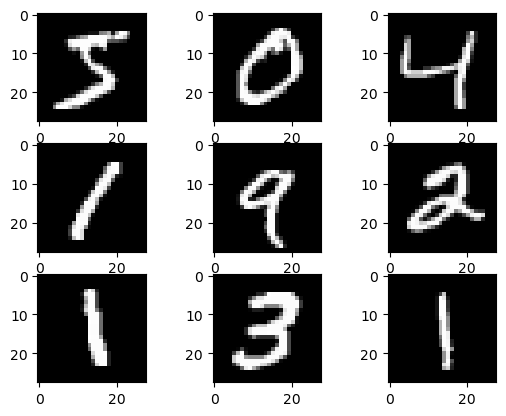

In [53]:
# Import the matplotlib.pyplot module for plotting
from matplotlib import pyplot

# plot the images from dataset
for i in range(9):

# Create a subplot for each image
 pyplot.subplot(330 + 1 + i)

# Plot the image with the specified colormap
 pyplot.imshow(X_train[i], cmap='gray')

# Display the plotted images
pyplot.show()

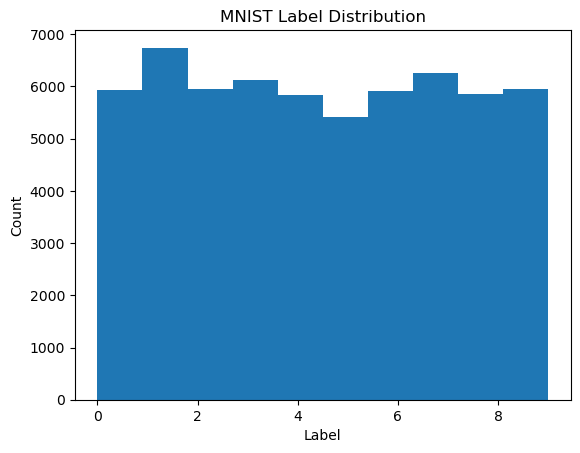

Label 0: 5923 samples
Label 1: 6742 samples
Label 2: 5958 samples
Label 3: 6131 samples
Label 4: 5842 samples
Label 5: 5421 samples
Label 6: 5918 samples
Label 7: 6265 samples
Label 8: 5851 samples
Label 9: 5949 samples


In [54]:
# Plot a histogram of the label distribution
from matplotlib import pyplot as plt

# Plot a histogram to visualize the distribution of labels in y_train
plt.hist(y_train, bins=10)

# Add labels for the axes to improve readability
plt.xlabel('Label')
plt.ylabel('Count')

# Add a title to describe the plot
plt.title('MNIST Label Distribution')
plt.show()

# Loop through all possible labels (0-9) in MNIST dataset
for i in range(10):
    count = len(y_train[y_train == i])
    
# Print the count of each label with a descriptive message
    print(f'Label {i}: {count} samples')

From the above, we can see that the data is balanced.

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell (please use at least 3 different deep learning models to solve your problem and compare the results):

In [55]:
# Calculate the total number of pixels per image (28x28)
num_pixels = X_train.shape[1] * X_train.shape[2]

# Reshape the training data to flatten each 28x28 image
X_train1 = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')

#Repeat the same reshaping process for the test data
X_test1 = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

# Normalize the pixel values in both training and test data
X_train1 = X_train1 / 255
X_test1 = X_test1 / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Extract the number of classes (categories) from the one-hot encoded labels
num_classes = y_test.shape[1]

#### Baseline Model with Multi-Layer Perceptrons: 
With a very basic neural network model consisting of only one hidden layer, we achieve very good results. Additionally, we will compare this to more intricate convolutional neural network models using it as a baseline. 
With one hidden layer and an equal number of neurons as inputs, the model is a basic neural network.


Write codes to implement the solution in python:

In [61]:
# Define a function to create a baseline model for MNIST classification
def baseline_model():
def baseline_model():
 
 # create model
 model = Sequential()
 model.add(Dense(num_pixels, input_shape=(num_pixels,), kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

# Compile the model for training
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Return the compiled model object
 return model

# Build the baseline model by calling the defined function
model = baseline_model()

# Train the model on the prepared training data (X_train1, y_train)
history = model.fit(X_train1, y_train, validation_data=(X_test1, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 0.9069 - loss: 0.3176 - val_accuracy: 0.9709 - val_loss: 0.0981
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9766 - loss: 0.0773 - val_accuracy: 0.9756 - val_loss: 0.0811
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9851 - loss: 0.0453 - val_accuracy: 0.9776 - val_loss: 0.0744
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9899 - loss: 0.0328 - val_accuracy: 0.9793 - val_loss: 0.0649
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9927 - loss: 0.0223 - val_accuracy: 0.9758 - val_loss: 0.0903
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 24ms/step - accuracy: 0.9942 - loss: 0.0172 - val_accuracy: 0.9798 - val_loss: 0.0764
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 190s 101ms/step - accuracy: 0.9949 - loss: 0.0142 - val_accuracy: 0.9810 - val_loss: 0.0753
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9960

In [64]:
# Final evaluation of the model's performance on the test set
scores_1 = model.evaluate(X_test1, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores_1[1]*100))

# Evaluate the model again on the test data, retrieving loss and accuracy values
final_loss, final_acc = model.evaluate(X_test1, y_test, verbose=0)

# Print the final loss
print("Final Loss: {0:.4f}, Final Accuracy: {1:.4f} %".format(final_loss, final_acc*100))

Baseline Error: 1.70%
Final Loss: 0.0823, Final Accuracy: 98.3000 %


Text(0.5, 1.0, 'Training History')

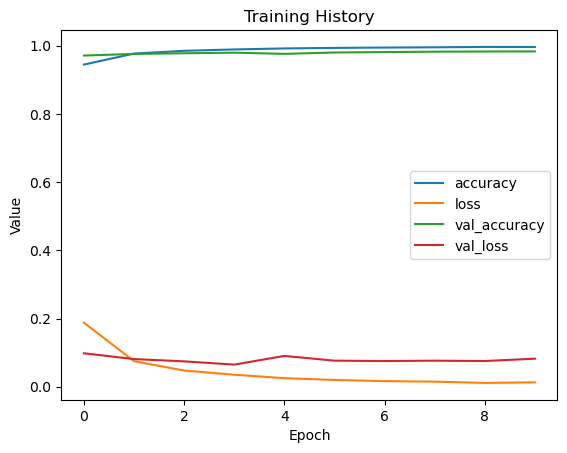

In [92]:
import pandas as pd

# Plot the training history
pd.DataFrame(history.history).plot()

# Set labels for x-axis and y-axis
plt.xlabel('Epoch')
plt.ylabel('Value')

# Set title for the plot
plt.title('Training History')


In [66]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the input data to match the format expected by convolutional neural networks (CNNs), which require a 4D input shape.
X_train2 = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test2 = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train2 = X_train / 255
X_test2 = X_test / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Get the number of classes (number of unique labels) from the shape of y_test.
num_classes = y_test.shape[1]

##### Simple Convolutional Neural Network:
In order to show how to leverage every feature of a contemporary CNN implementation—including convolutional layers, pooling layers, and dropout layers—we will build a basic CNN for MNIST.
Since convolutional neural networks are more intricate than conventional multi-layer perceptrons, you will begin with a basic structure that makes use of every component to achieve cutting-edge outcomes. This is an overview of the network architecture.


In [67]:
# define a simple CNN model
# This function defines a simple convolutional neural network (CNN) model using the Sequential API.
def simple_cnn():
 # create model
 model2 = Sequential()
 model2.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
 model2.add(MaxPooling2D())
 model2.add(Dropout(0.2))
 model2.add(Flatten())
 model2.add(Dense(128, activation='relu'))
 model2.add(Dense(num_classes, activation='softmax'))

# Compile model
 model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model2

# build the model
# Create an instance of the simple CNN model
model2 = simple_cnn()

# Fit the model
# Train the model on the training data (X_train2, y_train) and validate on the test data (X_test2, y_test)
history2 = model2.fit(X_train2, y_train, validation_data=(X_test2, y_test), epochs=10, batch_size=200)


C:\Users\SUNYLoaner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 25s 78ms/step - accuracy: 0.8656 - loss: 0.4812 - val_accuracy: 0.9785 - val_loss: 0.0744
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.9783 - loss: 0.0760 - val_accuracy: 0.9831 - val_loss: 0.0539
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.9840 - loss: 0.0546 - val_accuracy: 0.9851 - val_loss: 0.0449
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.9873 - loss: 0.0416 - val_accuracy: 0.9882 - val_loss: 0.0380
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 43s 74ms/step - accuracy: 0.9898 - loss: 0.0331 - val_accuracy: 0.9874 - val_loss: 0.0361
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 52s 110ms/step - accuracy: 0.9926 - loss: 0.0243 - val_accuracy: 0.9869 - val_loss: 0.0380
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.9924 - loss: 0.0232 - val_accuracy: 0.9875 - val_loss: 0.0368
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.9942 - loss: 0.0192 -

CNN Error: 1.10%
Final Loss: 0.0326, Final Accuracy: 98.9000 %


Text(0.5, 1.0, 'Training History')

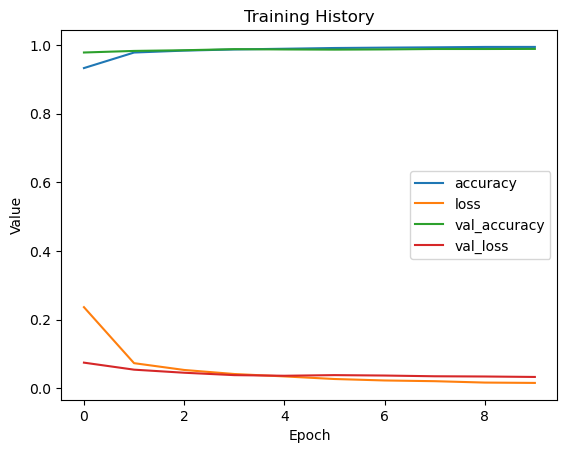

In [68]:
# Final evaluation of the model
scores_2 = model2.evaluate(X_test2, y_test, verbose=0)
# The error rate is calculated as 100% minus the test accuracy.
print("CNN Error: %.2f%%" % (100-scores_2[1]*100))

# Get the final loss and accuracy of the model
final_loss_2, final_acc_2 = model2.evaluate(X_test2, y_test, verbose=0)

# Print the final loss and accuracy of the model
print("Final Loss: {0:.4f}, Final Accuracy: {1:.4f} %".format(final_loss_2, final_acc_2*100))

# Plot the training history
# Create a plot showing the training history (loss and accuracy) over epochs.
pd.DataFrame(history2.history).plot()
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training History')

##### Larger Convolutional Neural Network:
We are now defining a big CNN architecture that includes fully linked, max pooling, and additional convolutional layers.

In [77]:
# define the larger CNN model
# This function defines a larger convolutional neural network (CNN) model using the Sequential API.
def larger_cnn_model():

 # create model
 model3 = Sequential()
 model3.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
 model3.add(MaxPooling2D())
 model3.add(Conv2D(15, (3, 3), activation='relu'))
 model3.add(MaxPooling2D())
 model3.add(Dropout(0.2))
 model3.add(Flatten())
 model3.add(Dense(128, activation='relu'))
 model3.add(Dense(50, activation='relu'))
 model3.add(Dense(num_classes, activation='softmax'))

 # Compile model
 model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model3

# build the model
# Create an instance of the larger CNN model
model3 = larger_cnn_model()

# Fit the model
# Train the model on the training data (X_train2, y_train) and validate on the test data (X_test2, y_test)
history3 = model3.fit(X_train2, y_train, validation_data=(X_test2, y_test), epochs=10, batch_size=200)

# Save the trained model to a file named 'final_model.h5'
model3.save('final_model.h5')

C:\Users\SUNYLoaner\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.7471 - loss: 0.7996 - val_accuracy: 0.9776 - val_loss: 0.0735
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - accuracy: 0.9701 - loss: 0.0970 - val_accuracy: 0.9824 - val_loss: 0.0515
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9761 - loss: 0.0768 - val_accuracy: 0.9874 - val_loss: 0.0378
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.9819 - loss: 0.0595 - val_accuracy: 0.9888 - val_loss: 0.0337
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9849 - loss: 0.0478 - val_accuracy: 0.9909 - val_loss: 0.0277
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.9862 - loss: 0.0428 - val_accuracy: 0.9904 - val_loss: 0.0272
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.9885 - loss: 0.0356 - val_accuracy: 0.9892 - val_loss: 0.0313
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.9888 - loss: 0.0360 - 

Large CNN Error: 0.82%
Final Loss: 0.0242, Final Accuracy: 99.1800 %


Text(0.5, 1.0, 'Training History')

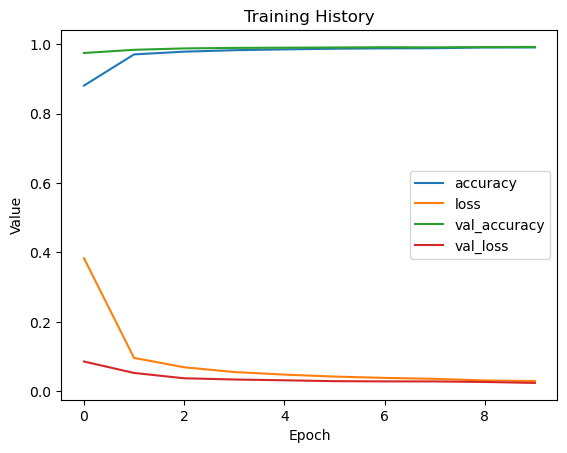

In [70]:
# Final evaluation of the model
# Evaluate the trained larger CNN model on the test data (X_test2, y_test) to compute the test loss and accuracy.
scores_3 = model3.evaluate(X_test2, y_test, verbose=0)

# Print the large CNN error rate
# The error rate is calculated as 100% minus the test accuracy.
print("Large CNN Error: %.2f%%" % (100-scores_3[1]*100))

# Get the final loss and accuracy of the model
final_loss_3, final_acc_3 = model3.evaluate(X_test2, y_test, verbose=0)
print("Final Loss: {0:.4f}, Final Accuracy: {1:.4f} %".format(final_loss_3, final_acc_3*100))

# Plot the training history
# Create a plot showing the training history (loss and accuracy) over epochs.
pd.DataFrame(history3.history).plot()
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training History')

# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


In [71]:
from prettytable import PrettyTable

# Create a PrettyTable object
x = PrettyTable()

# Add columns to the table
x.field_names = ["Model", "Accuracy","Final Loss","Error rate"]

#add rows to the table with the performance metrics for each model
x.add_row(["Baseline Model with Multi-Layer Perceptrons","{:.2f}%".format(final_acc*100),"{:.4f}".format(final_loss),"{:.2f}%".format(100-scores_1[1]*100)])
x.add_row(["Simple Convolutional Neural Network","{:.2f}%".format(final_acc_2*100),"{:.4f}".format(final_loss_2),"{:.2f}%".format(100-scores_2[1]*100)])
x.add_row(["Larger Convolutional Neural Network","{:.2f}%".format(final_acc_3*100),"{:.4f}".format(final_loss_3),"{:.2f}%".format(100-scores_3[1]*100)])

#printing the table
print(x)

+---------------------------------------------+----------+------------+------------+
|                    Model                    | Accuracy | Final Loss | Error rate |
+---------------------------------------------+----------+------------+------------+
| Baseline Model with Multi-Layer Perceptrons |  98.30%  |   0.0823   |   1.70%    |
|     Simple Convolutional Neural Network     |  98.90%  |   0.0326   |   1.10%    |
|     Larger Convolutional Neural Network     |  99.18%  |   0.0242   |   0.82%    |
+---------------------------------------------+----------+------------+------------+


C:\Users\SUNYLoaner\AppData\Local\Temp\ipykernel_17080\3117371482.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


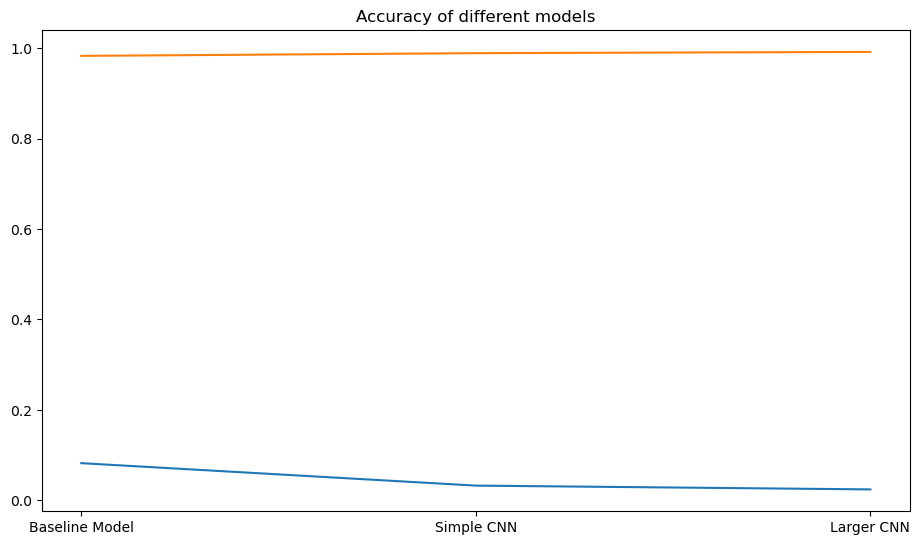

In [88]:
# Define model names for each model
model_1_name = "Baseline Model"
model_2_name = "Simple CNN"
model_3_name = "Larger CNN"


# Create a list of model names and performance values
# Model names are stored in the 'model' list and performance values are stored in the 'acc' list
model = [model_1_name, model_2_name, model_3_name]
acc = [scores_1,scores_2,scores_3]


# Create subplots with specific figure size and adjust the spacing between subplots
plt.subplots(figsize=(28,15))
plt.subplots_adjust(wspace=0.5, hspace=0.4)

# Create the first subplot (2x2 grid, position 1)
plt.subplot(2,2,1)

# Plot the accuracy of different models
plt.plot(model,acc)

# Set title for the subplot
plt.title("Accuracy of different models")

# Show the figure
plt.show()

We are able to forecast new photos using our larger CNN stored model.

The model presupposes that newly created photos are 28 by 28 pixels in size, grayscale, and have been aligned to include a single handwritten digit in the middle of each image.

We saved it as "sample_image.png," which contains a '7' number image, in your current working directory.


In [91]:
from numpy import argmax
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import load_model

# load and prepare the image
# This function loads an image file, prepares it for prediction by resizing, converting to grayscale, and normalizing pixel values.
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # convert to grayscale
    img = img.mean(axis=2)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('sample_image.png')
    # load model
    model3 = load_model('final_model.h5')
    # predict the class
    predict_value = model3.predict(img)
    digit = argmax(predict_value)
    print(digit)

# entry point, run the example
# Call the run_example function when the script is executed to perform inference on the example image.
run_example()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
7


*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace.Please make sure all the plotted tables and figures are in the notebook.